In [6]:
import gdown

file_id = "16_vcWLYlU_q7zf6nBny0M-aLCPwF3Qq2"
url = f"https://drive.google.com/uc?id={file_id}"
output = "fake.csv"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16_vcWLYlU_q7zf6nBny0M-aLCPwF3Qq2
From (redirected): https://drive.google.com/uc?id=16_vcWLYlU_q7zf6nBny0M-aLCPwF3Qq2&confirm=t&uuid=98210e90-cdb5-49ee-bb30-d91998d79eed
To: /content/fake.csv
100%|██████████| 62.8M/62.8M [00:01<00:00, 52.8MB/s]


'fake.csv'

In [7]:
file_id = "1jgD9OgMsiHz-2Ww9_00nhiegqubaQ6l2"
url = f"https://drive.google.com/uc?id={file_id}"
output = "true.csv"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jgD9OgMsiHz-2Ww9_00nhiegqubaQ6l2
To: /content/true.csv
100%|██████████| 53.6M/53.6M [00:01<00:00, 37.5MB/s]


'true.csv'

In [8]:
import pandas as pd

df_fake = pd.read_csv("./fake.csv")
df_true = pd.read_csv("./true.csv")
df = pd.concat([df_fake, df_true], ignore_index=True)

In [ ]:
df.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

news = df.drop(columns=["subject", "date"]).copy()
news["content"] = (
    news["title"]
    + " — "
    + news["text"]
).str.strip().copy()
news = news.drop(columns=["title", "text"])

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\w+|\d+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

news["content"] = news["content"].apply(preprocess_text)
news["content"].head()

,content
0,donald trump send embarrass new year eve messa...
1,drunk brag trump staffer start russian collus ...
2,sheriff david clark becom internet joke threat...
3,trump obsess even obama name code websit imag ...
4,pope franci call donald trump christma speech ...


In [ ]:
news["content"][0]

'donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald trump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan decemb one like calvin decemb impeach would make great year america also accept regain control congress miranda yaver decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb say happi new year koren 

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(
    news["content"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(23481, 384)

In [ ]:
import numpy as np
import os

OUTPUT_DIR = "/content/drive/MyDrive/Lab2/part1/chekpoints"

os.makedirs(OUTPUT_DIR, exist_ok=True)

output_path = os.path.join(OUTPUT_DIR, "news_embeddings.npz")

np.savez_compressed(
    output_path,
    embeddings=embeddings,
    content=news["content"].values,
    original=df["title"] + " — " + df["text"],
    index=news.index.values
)

print(f"Файл сохранён: {output_path}")

NameError: name 'embeddings' is not defined

In [3]:
import gdown

file_id = "1z0t5176GC0jh5StMlTdU9lpp476mSIRK"
url = f"https://drive.google.com/uc?id={file_id}"
output = "news_embeddings.npz"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1z0t5176GC0jh5StMlTdU9lpp476mSIRK
From (redirected): https://drive.google.com/uc?id=1z0t5176GC0jh5StMlTdU9lpp476mSIRK&confirm=t&uuid=d5ee1ae8-b49e-4f87-90d5-5a11ba15f53b
To: /content/news_embeddings.npz
100%|██████████| 130M/130M [00:03<00:00, 42.0MB/s]


'news_embeddings.npz'

In [9]:
import numpy as np

data = np.load("./news_embeddings.npz", allow_pickle=True)
embeddings = data["embeddings"]
content = data["content"]
original = data["original"]
fake_or_real = np.r_[np.zeros(df_fake.count()[0]), np.ones(df_true.count()[0])]

/tmp/ipython-input-3764288357.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fake_or_real = np.r_[np.zeros(df_fake.count()[0]), np.ones(df_true.count()[0])]
/tmp/ipython-input-3764288357.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fake_or_real = np.r_[np.zeros(df_fake.count()[0]), np.ones(df_true.count()[0])]


In [ ]:
original.shape

(44898,)

In [ ]:
!pip install umap-learn hdbscan matplotlib plotly bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00


In [10]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42,
    verbose=False
)
umap_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
import os
import joblib

os.makedirs(OUTPUT_DIR, exist_ok=True)

umap_model_path = os.path.join(OUTPUT_DIR, "umap_model.pkl")
with open(umap_model_path, 'wb') as f:
    joblib.dump(umap_model, f)

In [11]:
import joblib

file_id = "13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW"
url = f"https://drive.google.com/uc?id={file_id}"
output = "umap_model.pkl"

gdown.download(url, output, quiet=False)
umap_model = joblib.load("umap_model.pkl")
umap_embeddings = umap_model.fit_transform(embeddings)

Downloading...
From (original): https://drive.google.com/uc?id=13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW
From (redirected): https://drive.google.com/uc?id=13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW&confirm=t&uuid=97977286-3b37-4831-a79a-85f89fc5fabb
To: /content/umap_model.pkl
100%|██████████| 284M/284M [00:07<00:00, 36.5MB/s]


In [19]:
import hdbscan
import hdbscan.validity as hsv
import warnings
import pandas as pd

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=15,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)
cluster_labels = clusterer.fit_predict(umap_embeddings)
outlier_scores = clusterer.outlier_scores_
news = pd.DataFrame({
    "content": content,
    "original": original,
})
news["cluster"] = cluster_labels
news["outlier_score"] = outlier_scores

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_outliers = (cluster_labels == -1).sum()
print(f"Найдено {n_clusters} кластеров и {n_outliers} выбросов ({n_outliers/len(content):.1%})")

warnings.filterwarnings("ignore", category=RuntimeWarning)
validity = hsv.validity_index(embeddings.astype(np.float64), cluster_labels)
print('Плотность и связанность кластеров (DBCV):', validity)

Найдено 193 кластеров и 12657 выбросов (28.2%)
Плотность и связанность кластеров (DBCV): -0.24136284658238294


In [ ]:
import os
import joblib

os.makedirs(OUTPUT_DIR, exist_ok=True)

joblib.dump(clusterer, os.path.join(OUTPUT_DIR, "hdbscan_model.joblib"))

['/content/drive/MyDrive/Lab2/part1/checkpoints/hdbscan_model.joblib']

In [ ]:
file_id = "1VGFfIeu6LX3ArtbMObcQRCT8K9qbi3vF"

url = f"https://drive.google.com/uc?id={file_id}"
output = "hdbscan_model.pkl"

gdown.download(url, output, quiet=False)
clusterer = joblib.load("hdbscan_model.pkl")

Downloading...
From: https://drive.google.com/uc?id=1VGFfIeu6LX3ArtbMObcQRCT8K9qbi3vF
To: /content/hdbscan_model.pkl
100%|██████████| 9.92M/9.92M [00:00<00:00, 29.3MB/s]


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

topic_model = BERTopic(
    embedding_model='all-MiniLM-L6-v2',
    umap_model=umap_model,
    hdbscan_model=clusterer,
    vectorizer_model=CountVectorizer(stop_words="english", ngram_range=(1, 2)),
    min_topic_size=20,
    nr_topics="auto",
    calculate_probabilities=True,
    verbose=True
)

topics, probs = topic_model.fit_transform(original)
news["topic"] = topics
news["topic_prob"] = [p.max() if len(p) > 0 else 0 for p in probs]

2025-12-30 12:01:05,123 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

2025-12-30 13:18:39,395 - BERTopic - Embedding - Completed ✓
2025-12-30 13:18:39,400 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-30 13:19:47,432 - BERTopic - Dimensionality - Completed ✓
2025-12-30 13:19:47,437 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-30 13:21:58,614 - BERTopic - Cluster - Completed ✓
2025-12-30 13:21:58,616 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-12-30 13:23:15,390 - BERTopic - Representation - Completed ✓
2025-12-30 13:23:15,553 - BERTopic - Topic reduction - Reducing number of topics
2025-12-30 13:23:15,672 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-30 13:24:25,719 - BERTopic - Representation - Completed ✓
2025-12-30 13:24:25,891 - BERTopic - Topic reduction - Reduced number of topics from 213 to 21


In [ ]:
import os
import joblib
OUTPUT_DIR = "/content/drive/MyDrive/Lab2/part1/chekpoints1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

joblib.dump(topic_model, os.path.join(OUTPUT_DIR, "bertopic_model"))

['/content/drive/MyDrive/Lab2/part1/chekpoints1/bertopic_model']

In [ ]:
loaded_model = BERTopic.load("/content/drive/MyDrive/Lab2/part1/checkpoints/bertopic_model")

In [ ]:
file_id = "1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF"

url = f"https://drive.google.com/uc?id={file_id}"
output = "bertopic_model"

gdown.download(url, output, quiet=False)
topic_model = BERTopic.load("bertopic_model")

Downloading...
From (original): https://drive.google.com/uc?id=1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF
From (redirected): https://drive.google.com/uc?id=1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF&confirm=t&uuid=dfb29ab0-377e-425e-8e3c-5cfd20e7a8e5
To: /content/bertopic_model
100%|██████████| 601M/601M [00:15<00:00, 39.6MB/s]


In [ ]:
topic_stats = news.groupby("topic").agg(
    total=("topic", "size"),
    outliers=("cluster", lambda x: (x == -1).sum()),
    outlier_rate=("cluster", lambda x: (x == -1).mean()),
    mean_outlier_score=("outlier_score", "mean")
).sort_values("outlier_rate", ascending=False)

suspicious_topics = topic_stats.head(10)
print("Топ-5 тем с наибольшей долей выбросов:")
for topic_id, row in suspicious_topics.head(5).iterrows():
    words = ", ".join([w for w, _ in topic_model.get_topic(topic_id)[:5]])
    print(f"Тема {topic_id:>3}: {row['outlier_rate']:.1%} выбросов | [{words}]")

Топ-5 тем с наибольшей долей выбросов:
Тема  18: 55.6% выбросов | [najib, 1mdb, malaysia, said, malaysian]
Тема  -1: 44.2% выбросов | [trump, said, president, people, obama]
Тема   6: 35.0% выбросов | [duterte, philippines, drugs, police, manila]
Тема   4: 29.4% выбросов | [italy, star, malta, berlusconi, caruana]
Тема   0: 22.0% выбросов | [trump, said, president, people, state]


In [ ]:
# Комбинированный скор: аномальность + уверенность в теме
news["fake_score"] = (
    0.6 * news["outlier_score"] +
    0.3 * (1 - news["topic_prob"]) +  # низкая уверенность в теме → подозрительно
    0.1 * (news["cluster"] == -1).astype(int)
)

top_suspicious = news.nlargest(200, "fake_score")[
    ["content", "fake_score", "outlier_score", "topic", "cluster", "topic_prob"]
]

top_suspicious.to_csv("suspicious_news.csv", index=False)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


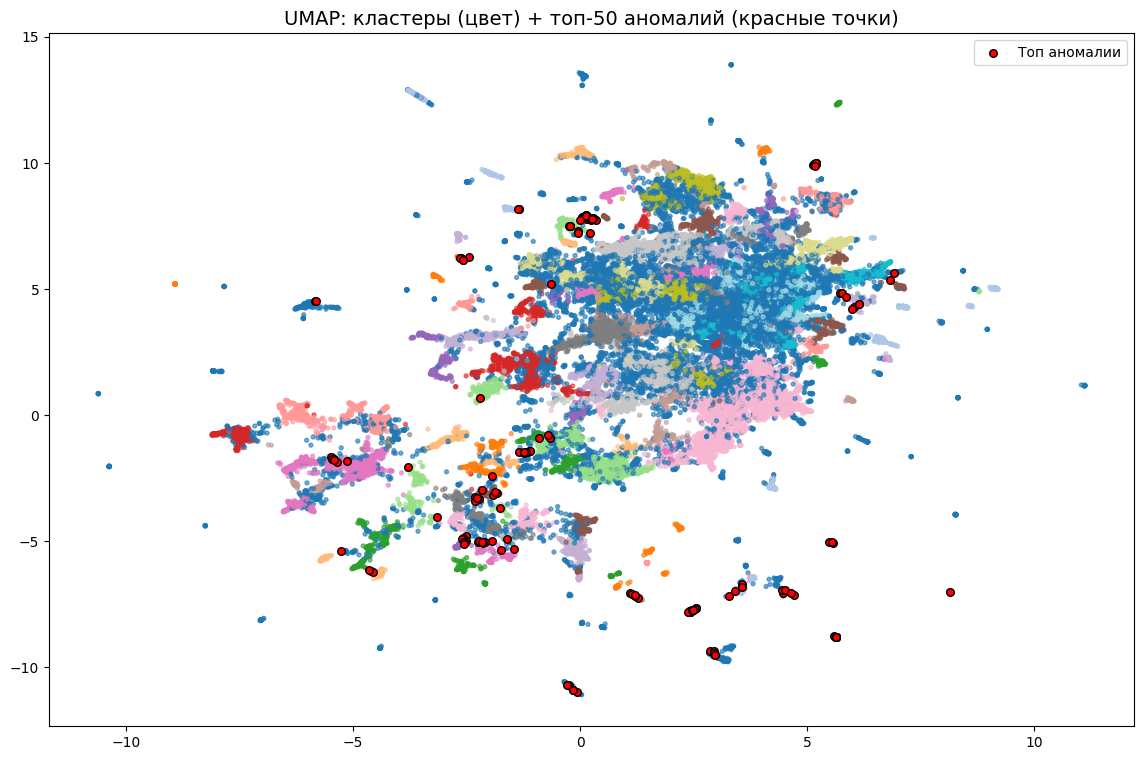

In [ ]:
import matplotlib.pyplot as plt
import umap

# 2D-UMAP для графика
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine', random_state=42)
X_2d = umap_2d.fit_transform(embeddings)

plt.figure(figsize=(14, 9))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=news["cluster"], cmap='tab20', s=8, alpha=0.6)

top_idx = news.nlargest(200, "outlier_score").index
plt.scatter(X_2d[top_idx, 0], X_2d[top_idx, 1], c='red', s=30, label='Топ аномалии', edgecolor='k')

plt.legend()
plt.title("UMAP: кластеры (цвет) + топ-50 аномалий (красные точки)", fontsize=14)
plt.savefig("umap_suspicious.png", dpi=150)
plt.show()

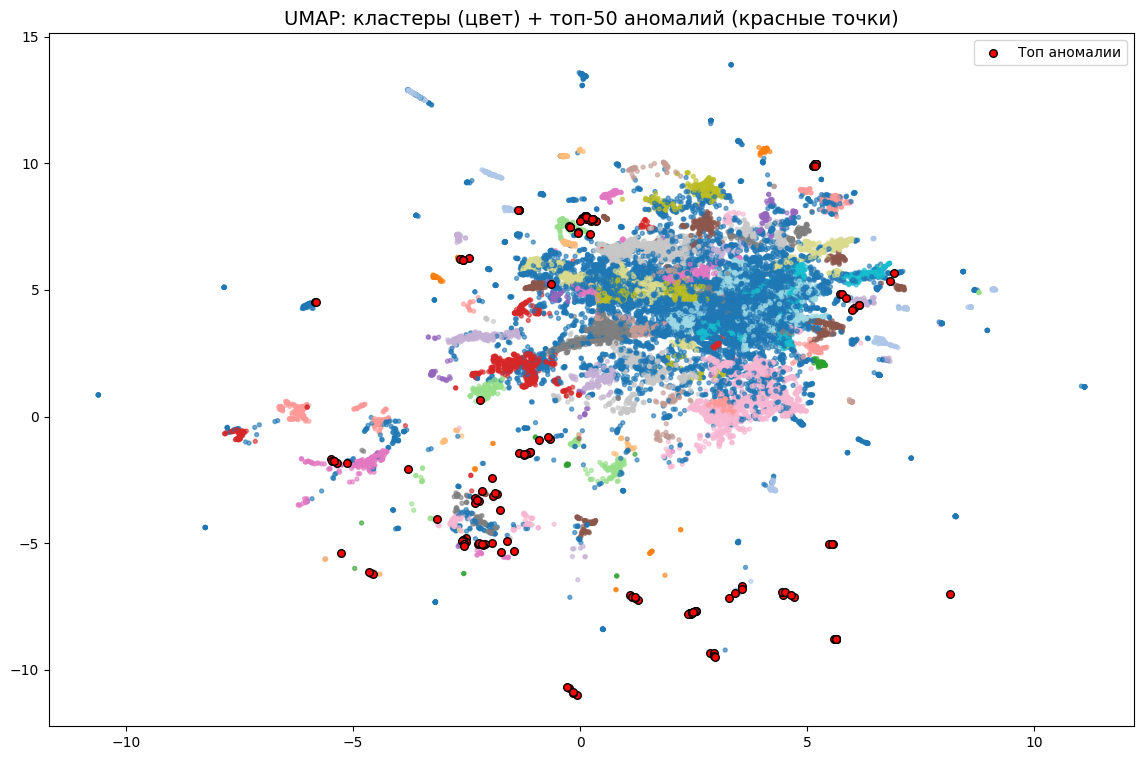

In [ ]:
indices = news.index[news['fake-or-real'] == 0].tolist()
fakeX_2d = X_2d[indices]
fake_news = news.loc[indices]

plt.figure(figsize=(14, 9))
scatter = plt.scatter(fakeX_2d[:, 0], fakeX_2d[:, 1], c=fake_news["cluster"], cmap='tab20', s=8, alpha=0.6)

top_idx = news.nlargest(200, "outlier_score").index
plt.scatter(X_2d[top_idx, 0], X_2d[top_idx, 1], c='red', s=30, label='Топ аномалии', edgecolor='k')

plt.legend()
plt.title("UMAP: кластеры (цвет) + топ-50 аномалий (красные точки)", fontsize=14)
plt.savefig("umap_suspicious.png", dpi=150)
plt.show()

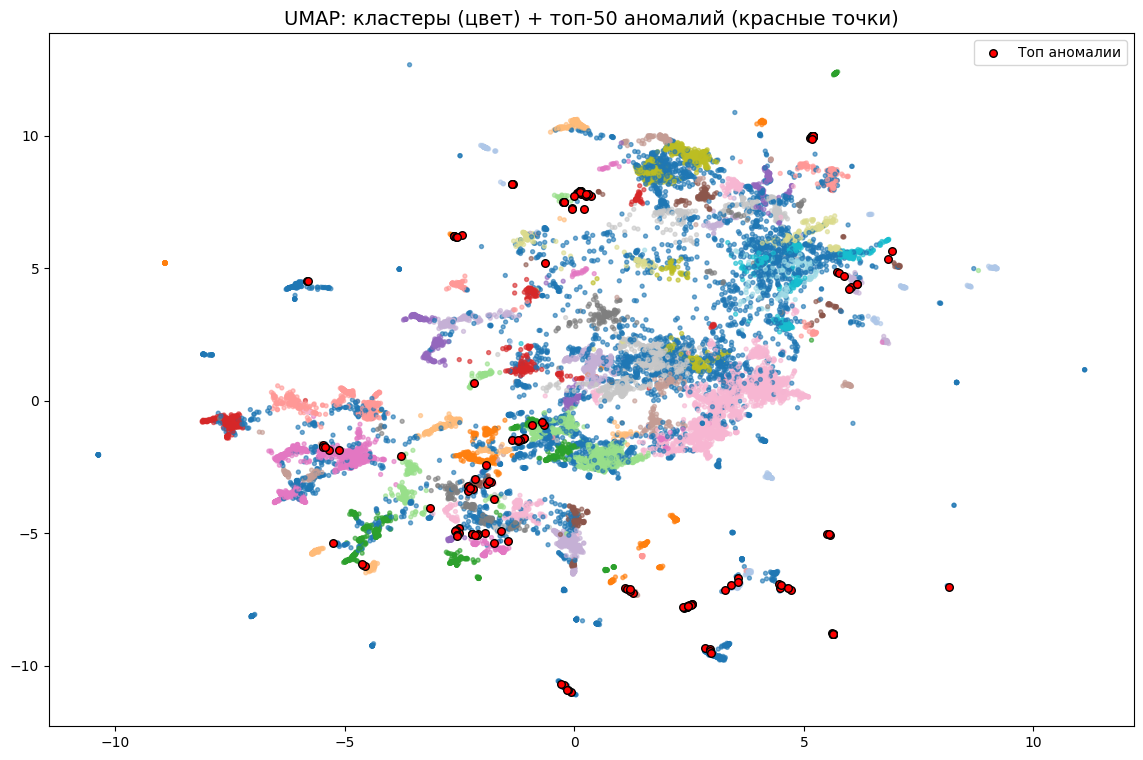

In [ ]:
indices = news.index[news['fake-or-real'] == 1].tolist()
realX_2d = X_2d[indices]
real_news = news.loc[indices]

plt.figure(figsize=(14, 9))
scatter = plt.scatter(realX_2d[:, 0], realX_2d[:, 1], c=real_news["cluster"], cmap='tab20', s=8, alpha=0.6)

top_idx = news.nlargest(200, "outlier_score").index
plt.scatter(X_2d[top_idx, 0], X_2d[top_idx, 1], c='red', s=30, label='Топ аномалии', edgecolor='k')

plt.legend()
plt.title("UMAP: кластеры (цвет) + топ-50 аномалий (красные точки)", fontsize=14)
plt.savefig("umap_suspicious.png", dpi=150)
plt.show()

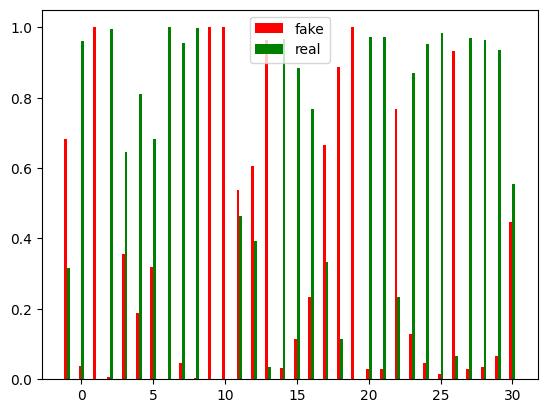

In [ ]:
counts = news.groupby(['cluster', 'fake-or-real'], as_index=True)
counts_dict = {tuple(map(int, key)): len(value) for key, value in counts.indices.items()}

fake_real = {}
for (cluster, fake_or_real), count in counts_dict.items():
    if cluster not in fake_real:
        fake_real[cluster] = [0, 0]
    fake_real[cluster][fake_or_real] = count

clusters = np.array(tuple(fake_real.keys()), dtype=np.float64)[:, np.newaxis]
counts_ = np.array(tuple(fake_real.values()), dtype=np.float64)
np_fake_real = np.concatenate((clusters, counts_), axis=1)
np_fake_real_norm = np_fake_real.copy()
np_fake_real_norm[:, 1:] /= np.sum(np_fake_real[:, 1:], axis=1)[:, np.newaxis]

n = 30
show_fake = np_fake_real_norm[:, (0, 1)][np_fake_real_norm[:, 0] <= n]
show_real = np_fake_real_norm[:, (0, 2)][np_fake_real_norm[:, 0] <= n]
plt.bar(show_fake[:, 0] - 0.1, show_fake[:, 1], width=0.2, label='fake', color='red')
plt.bar(show_real[:, 0] + 0.1, show_real[:, 1], width=0.2, label='real', color='green')
plt.legend()
plt.show()

In [ ]:
real_clusters = np.sum(np_fake_real_norm[:, 2] >= 0.9)
fake_clusters = np.sum(np_fake_real_norm[:, 1] >= 0.9)
total_clusters = np_fake_real_norm.shape[0]
mix_clusters = total_clusters - real_clusters - fake_clusters


print('total: ', total_clusters)
print(f'real:\t{real_clusters / total_clusters * 100:.3f}%\n'
      f'fake:\t{fake_clusters / total_clusters * 100:.3f}%\n',
      f'mix:\t{mix_clusters / total_clusters * 100:.3f}%')

total:  194
real:	28.351%
fake:	20.619%
 mix:	51.031%
